In [1]:
import networkx as nx
import sys
import isort
import importlib
from types import ModuleType


In [2]:
G = nx.Graph()

In [3]:
def get_stdlib_packages():
    if sys.version_info.minor == 10:
        module_names = sys.stdlib_module_names
    else:
        module_names = isort.stdlibs.py38.stdlib

    external_packages = list()
    for name in module_names:
        if name[0] == '_' or name == 'this' or name == 'antigravity':
            continue
        external_packages.append(name)
    return external_packages

def get_real_packages(package_names):
    real_modules = list()
    not_importable_modules = list()
    for name in package_names:
        try:
            importlib.import_module(name)
            real_modules.append(name)
        except:
            not_importable_modules.append(name)
    return real_modules, not_importable_modules


def get_real():
    external_packages = get_stdlib_packages()
    return get_real_packages(external_packages)

In [4]:
real_modules, _ = get_real()

In [5]:
def module_dependency(module_names, name):
    if name not in module_names:
        raise Exception(f'{name} is not importable module')
    dp_names = list()

    for key, val in vars(sys.modules[name]).items():
        if isinstance(val, ModuleType):
            md_name = val.__name__

            try:
                index = md_name.index(".")
                md_name = md_name[0:index]
            except:
                pass
                
            if md_name != name:
                dp_names.append(md_name)

    return dp_names

In [6]:
dp = module_dependency(real_modules, 'urllib')
print(dp)

# print(vars(sys.modules['urllib']).items())

[]


In [7]:
def module_dependency_map(modules):
    md_map = dict()
    for md in modules:
        md_map[md] = module_dependency(modules, md)
    return md_map

md_map = module_dependency_map(real_modules)

In [8]:
def build_adj_list(md_map):
    index_list = list()
    edges = list()

    for k, v in md_map.items():
        index_list.append(k)

    n = len(index_list)
    for i in range(n):
        adj_v = md_map[index_list[i]]
        for name in adj_v:
            try:
                j = index_list.index(name)
                edges.append(tuple([i,j]))
            except:
                continue

    return edges, index_list

In [9]:
edges, index_list = build_adj_list(md_map)
print(edges)

[(0, 161), (0, 90), (0, 68), (0, 183), (0, 124), (1, 14), (1, 124), (1, 5), (2, 183), (2, 14), (2, 187), (4, 90), (4, 14), (4, 75), (4, 86), (6, 14), (7, 86), (7, 54), (7, 188), (7, 90), (7, 192), (7, 14), (7, 121), (7, 19), (7, 132), (7, 75), (7, 124), (7, 45), (7, 92), (7, 128), (7, 105), (7, 40), (7, 152), (8, 14), (8, 124), (8, 121), (8, 200), (9, 119), (9, 80), (9, 12), (9, 14), (9, 173), (9, 183), (9, 124), (9, 109), (9, 15), (10, 164), (10, 124), (10, 14), (12, 54), (12, 124), (12, 14), (12, 29), (14, 37), (14, 124), (14, 132), (14, 121), (19, 14), (19, 124), (19, 132), (19, 164), (19, 106), (19, 150), (19, 11), (20, 140), (20, 92), (20, 106), (21, 14), (21, 124), (21, 188), (21, 55), (21, 75), (22, 188), (22, 188), (22, 188), (22, 14), (22, 124), (22, 29), (22, 89), (22, 156), (23, 14), (23, 123), (23, 132), (24, 124), (24, 14), (24, 92), (24, 90), (24, 183), (24, 109), (24, 156), (24, 155), (24, 106), (24, 45), (24, 107), (26, 161), (26, 124), (27, 188), (27, 188), (27, 90), (

In [10]:
print(md_map)

{'pickletools': ['codecs', 'io', 'pickle', 're', 'sys'], 'pty': ['os', 'sys', 'tty'], 'pipes': ['re', 'os', 'tempfile'], 'spwd': [], 'binhex': ['io', 'os', 'struct', 'binascii'], 'tty': [], 'getopt': ['os'], 'zipfile': ['binascii', 'functools', 'importlib', 'io', 'itertools', 'os', 'posixpath', 'shutil', 'stat', 'struct', 'sys', 'threading', 'time', 'contextlib', 'zlib', 'bz2', 'lzma'], 'mimetypes': ['os', 'sys', 'posixpath', 'urllib'], 'doctest': ['__future__', 'difflib', 'inspect', 'linecache', 'os', 'pdb', 're', 'sys', 'traceback', 'unittest'], 'bdb': ['fnmatch', 'sys', 'os'], 'posix': [], 'linecache': ['functools', 'sys', 'os', 'tokenize'], 'math': [], 'os': ['abc', 'sys', 'stat', 'posixpath'], 'unittest': [], 'bisect': [], 'symbol': [], 'ossaudiodev': [], 'shutil': ['os', 'sys', 'stat', 'fnmatch', 'collections', 'errno', 'posix'], 'sqlite3': ['datetime', 'time', 'collections'], 'compileall': ['os', 'sys', 'importlib', 'py_compile', 'struct'], 'imp': ['importlib', 'importlib', 'imp

In [11]:
# G.add_edges_from(edges)

In [12]:
# print(len(list(G.nodes)))

In [13]:
DG = nx.DiGraph(edges)

In [14]:
# print(len(list(DG.nodes)))

In [15]:
sorted(nx.simple_cycles(DG))

[[121, 14]]

In [16]:
print(index_list[64], index_list[4])


imghdr binhex


In [17]:
import os
import posixpath

print(md_map)

{'pickletools': ['codecs', 'io', 'pickle', 're', 'sys'], 'pty': ['os', 'sys', 'tty'], 'pipes': ['re', 'os', 'tempfile'], 'spwd': [], 'binhex': ['io', 'os', 'struct', 'binascii'], 'tty': [], 'getopt': ['os'], 'zipfile': ['binascii', 'functools', 'importlib', 'io', 'itertools', 'os', 'posixpath', 'shutil', 'stat', 'struct', 'sys', 'threading', 'time', 'contextlib', 'zlib', 'bz2', 'lzma'], 'mimetypes': ['os', 'sys', 'posixpath', 'urllib'], 'doctest': ['__future__', 'difflib', 'inspect', 'linecache', 'os', 'pdb', 're', 'sys', 'traceback', 'unittest'], 'bdb': ['fnmatch', 'sys', 'os'], 'posix': [], 'linecache': ['functools', 'sys', 'os', 'tokenize'], 'math': [], 'os': ['abc', 'sys', 'stat', 'posixpath'], 'unittest': [], 'bisect': [], 'symbol': [], 'ossaudiodev': [], 'shutil': ['os', 'sys', 'stat', 'fnmatch', 'collections', 'errno', 'posix'], 'sqlite3': ['datetime', 'time', 'collections'], 'compileall': ['os', 'sys', 'importlib', 'py_compile', 'struct'], 'imp': ['importlib', 'importlib', 'imp

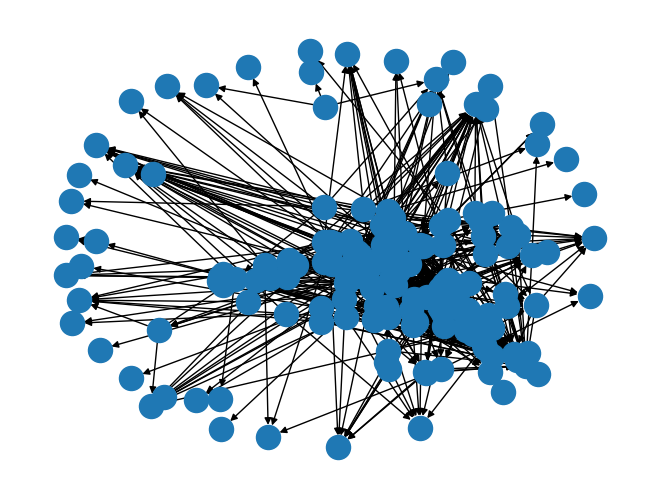

In [18]:
import matplotlib
nx.draw(DG)

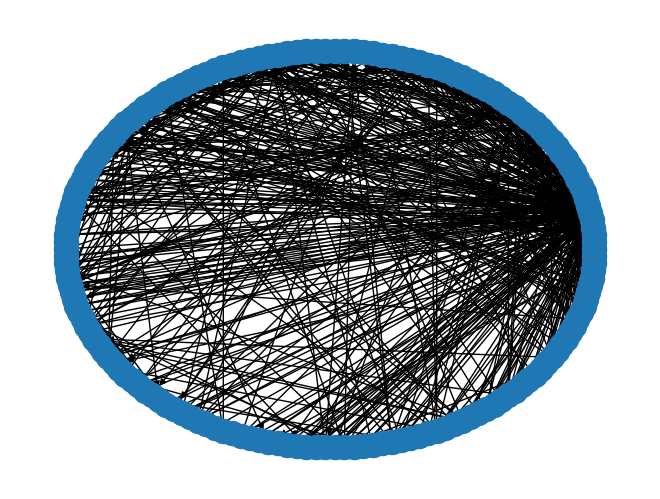

In [19]:
nx.draw_circular(DG)